In [6]:
import pandas as pd

data = pd.read_csv('population.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN


In [28]:
column_names = data.columns.tolist()
ukraine_data = data.iloc[248].tolist()
ukraine_data_dict = dict(zip(column_names, ukraine_data))
print(ukraine_data_dict)

{'Country Name': 'Ukraine', 'Country Code': 'UKR', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 42767251.0, '1961': 43365219.0, '1962': 43924755.0, '1963': 44445903.0, '1964': 44941406.0, '1965': 45387091.0, '1966': 45809120.0, '1967': 46235370.0, '1968': 46635196.0, '1969': 46990889.0, '1970': 47279086.0, '1971': 47597756.0, '1972': 47974187.0, '1973': 48301548.0, '1974': 48602694.0, '1975': 48892187.0, '1976': 49144535.0, '1977': 49357430.0, '1978': 49536615.0, '1979': 49739734.0, '1980': 49973920.0, '1981': 50221000.0, '1982': 50384000.0, '1983': 50564000.0, '1984': 50754000.0, '1985': 50917000.0, '1986': 51097000.0, '1987': 51293000.0, '1988': 51521000.0, '1989': 51773000.0, '1990': 51891400.0, '1991': 52000500.0, '1992': 52150400.0, '1993': 52179200.0, '1994': 51921400.0, '1995': 51512800.0, '1996': 51057800.0, '1997': 50594600.0, '1998': 50144500.0, '1999': 49674000.0, '2000': 49176500.0, '2001': 48662400.0, '2002': 48202470.0, '2003': 47812949.

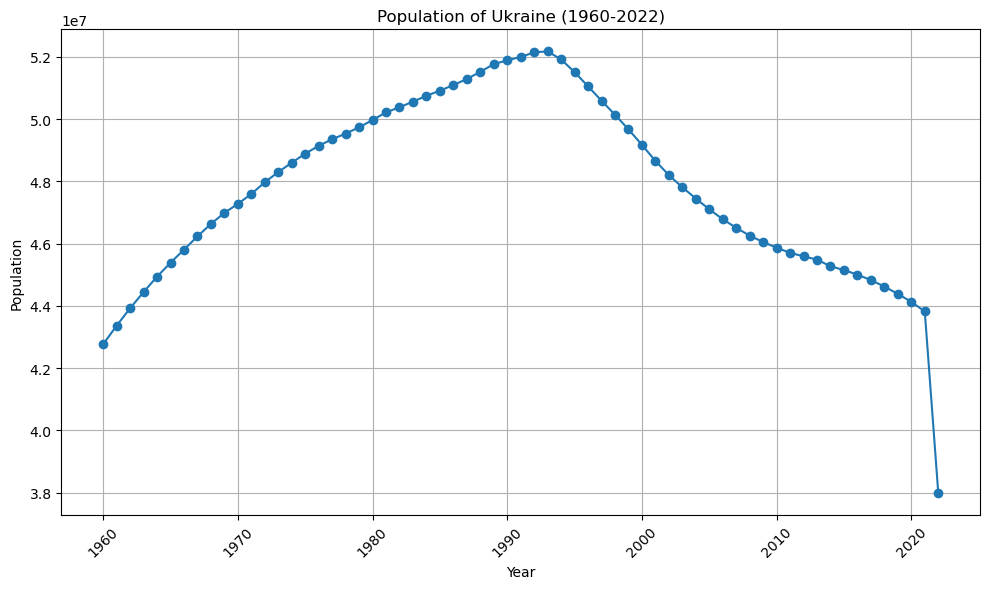

In [29]:
import matplotlib.pyplot as plt

# Extract the years and population values
years = []
population = []
for key, value in ukraine_data_dict.items():
    try:
        year = int(key)
        years.append(year)
        population.append(value)
    except ValueError:
        continue

plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o')
plt.title('Population of Ukraine (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
# Ukraine Population analysis
import statsmodels.api as sm

# Create a time series
ts = pd.Series(population, index=pd.date_range('1960', periods=len(population), freq='Y'))
ts.head()

# Fill missing values in the time series
ts_filled = ts.fillna(0)

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(ts_filled, model='multiplicative')
decomposition.plot()
plt.show()


/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_23953/2467714884.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts = pd.Series(population, index=pd.date_range('1960', periods=len(population), freq='Y'))


ValueError: Multiplicative seasonality is not appropriate for zero and negative values